In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.colors as mcolorsx
from matplotlib.patches import Circle

import os
from glob import glob

from astropy.io import fits
from astropy.wcs import WCS
from astropy.wcs.utils import proj_plane_pixel_scales
from astropy.nddata import Cutout2D

from reproject import reproject_exact

from AstroColour.AstroColour import RGB

%matplotlib widget

In [2]:
# plt.rc('text', usetex=True)
# plt.rc('font', family='serif')
# fig_width_pt = 244.0  # Get this from LaTeX using \the\columnwidth
# text_width_pt = 508.0 # Get this from LaTeX using \the\textwidth

# # plt.rc('font', size=21)
# # plt.rc('xtick', labelsize=21)
# # plt.rc('ytick', labelsize=21)

# inches_per_pt = 1.0/72.27               # Convert pt to inches
# golden_mean = (np.sqrt(5)-1.0)/2.0         # Aesthetic ratio
# fig_width = fig_width_pt*inches_per_pt*1.5 # width in inches
# fig_width_full = text_width_pt*inches_per_pt  # 17

In [3]:
ra = 94.07646 
dec = -21.37581

files = sorted(glob('/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/*crf.fits'))

files

['/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00001_mirimage_o001_crf.fits',
 '/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00002_mirimage_o001_crf.fits',
 '/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00003_mirimage_o001_crf.fits',
 '/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00004_mirimage_o001_crf.fits',
 '/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00005_mirimage_o001_crf.fits',
 '/Users/zgl12/Downloads/MAST_2025-11-03T19_13_34.683Z/MAST_2025-11-03T19_13_34.683Z/JWST/jw06553001001_02101_00006_mirimage_o001_crf.fits']

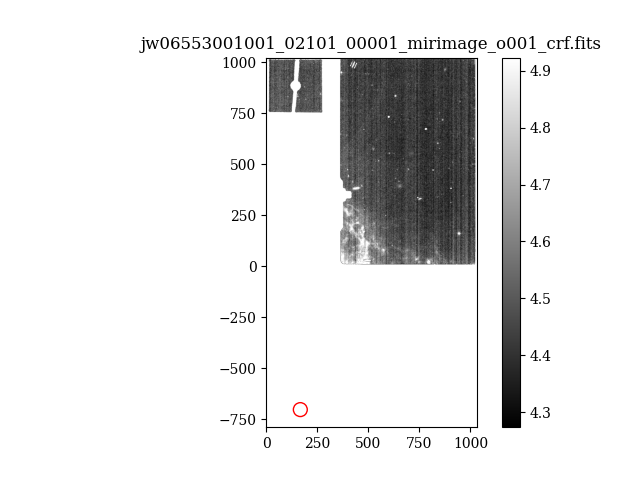

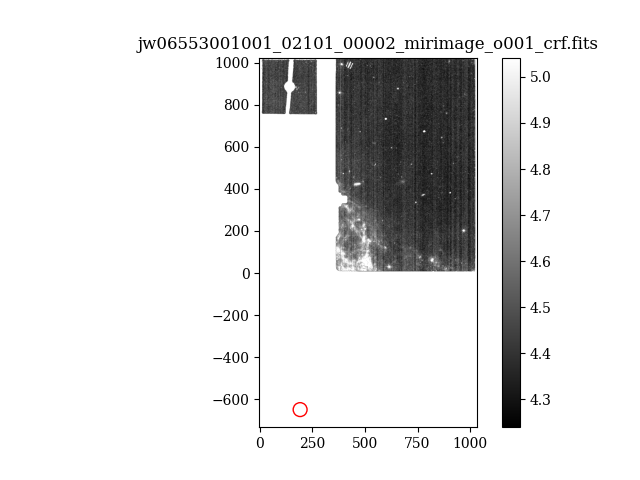

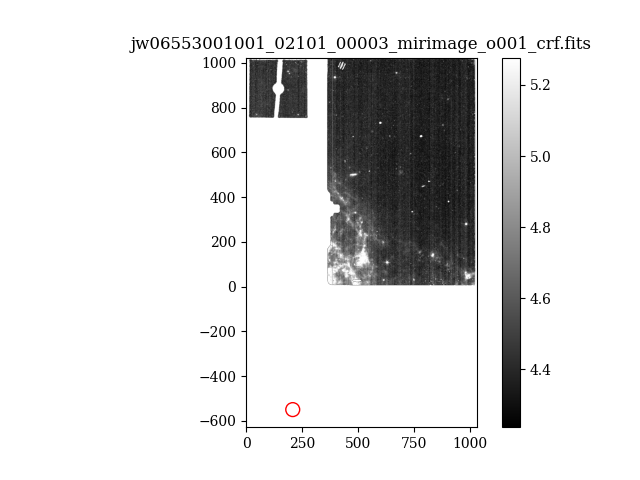

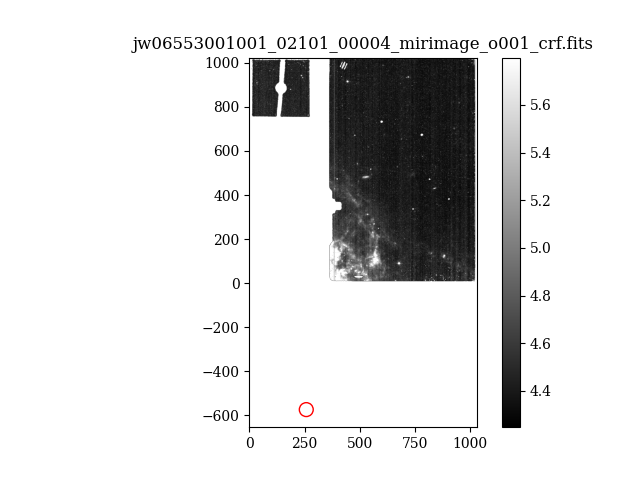

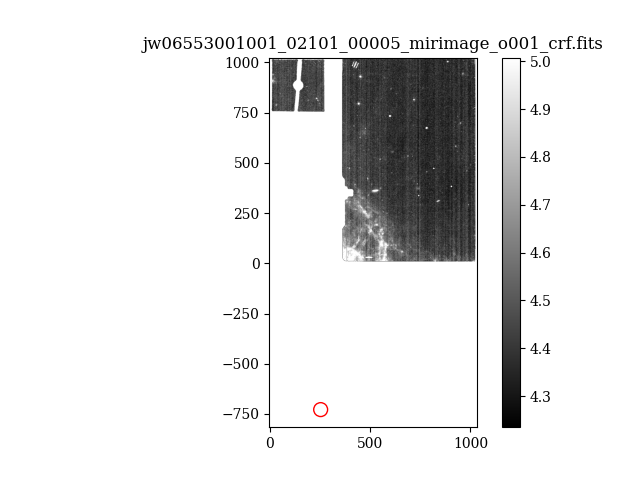

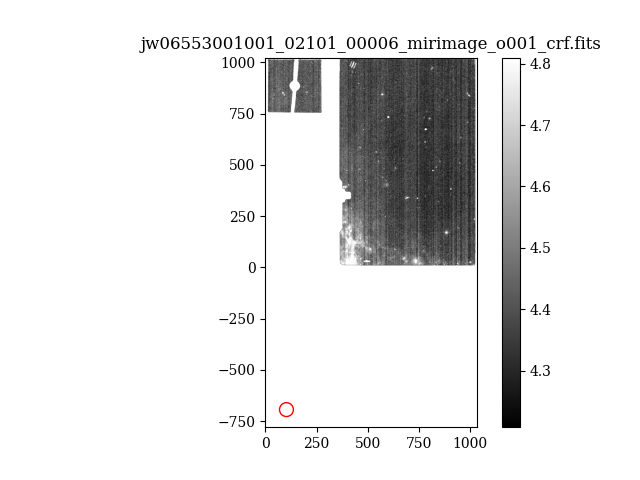

In [4]:
for file in files:
    hdu = fits.open(file)

    image_data = hdu[1].data
    wcs = WCS(hdu[1].header)
    hdu.close()
    
    # Convert RA/Dec to pixel coords (x, y)
    x, y = wcs.all_world2pix(ra, dec, 0)
    
    plt.figure()
    plt.imshow(image_data, origin='lower', cmap='gray', vmin=np.nanpercentile(image_data, 5), vmax=np.nanpercentile(image_data, 99))
    plt.colorbar()
    plt.scatter(x, y, s=100, edgecolor='red', facecolor='none', marker='o')
    plt.title(os.path.basename(file))
    plt.show()

    # # Cutout around that position
    # size = (530, 530)  # (ny, nx)
    # cutout = Cutout2D(image_data, (x, y), size, wcs=wcs)

    # cut_data = cutout.data
    # cut_wcs = cutout.wcs
    
    # wcs_list.append(cut_wcs)
    
    # f_files.append(cut_data)